# ERC-4626: all vaults on Arbitrum

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 25,011 vaults in the database and 13,918,675 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 3,020,065 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 10:13:15  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 11:13:20  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 12:13:25  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   

                                                        address  block_number  \
timestamp                                                                       
2024-01-11 09:13:06  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169318721   
2024-01-11 10:13:15  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169333121   
2024-01-11 11:13:20  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169347521   
2024-01-11 12:13:25  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169361921   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2024-01-11 09:13:06         1.00          1.00          1.00              NaN   
2024-01-11 10:13:15         1.00          1.00          1.00              NaN   
2024-01-11 11:13:20         1.00          1.00          1.00              NaN   
2024-01-11 12:13:25         1.00          1.00          1.00              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2024-01-11 09:13:06             NaN         Staked USDA (Arbitrum) #6430   
2024-01-11 10:13:15             NaN         Staked USDA (Arbitrum) #6430   
2024-01-11 11:13:20             NaN         Staked USDA (Arbitrum) #6430   
2024-01-11 12:13:25             NaN         Staked USDA (Arbitrum) #6430   

                     event_count                       protocol  \
timestamp                                                         
2024-01-11 09:13:06       127527  <protocol not yet identified>   
2024-01-11 10:13:15       127527  <protocol not yet identified>   
2024-01-11 11:13:20       127527  <protocol not yet identified>   
2024-01-11 12:13:25       127527  <protocol not yet identified>   

                     raw_share_price  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2024-01-11 09:13:06             1.00        0.00             2,777.08   
2024-01-11 10:13:15             1.00        0.00             2,777.08   
2024-01-11 11:13:20             1.00        0.00             2,777.08   
2024-01-11 12:13:25             1.00        0.00             2,777.08   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2024-01-11 09:13:06                  55.54                True  
2024-01-11 10:13:15                  55.54                True  
2024-01-11 11:13:20                  55.54                True  
2024-01-11 12:13:25                  55.54                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 292 vaults out of total of 5,731 vaults on chain Arbitrum, having 676,542 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4           Share token                                             plvGLP
5                   NAV                          218852.566660400704649665
6              Protocol                      <protocol not yet identified>
7              Mgmt fee                                               None
8              Perf fee                                               None
9           Deposit fee                                               None
10         Withdraw fee                                               None
11               Shares                          157940.074220509572793378
12           First seen                                2022-08-26 11:27:33
13             Features                                                   
14              Lock up                                               None
15      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
16  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
17         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...
18                _fees  FeeData(fee_mode=None, management=None, perfor...

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/119 [00:00<?, ?it/s]

Cleaning metrics for 119 vaults
Vault entries with too high NAV values filtered out: 1
Vault entries with too small ATH NAV values filtered out: 0
Vaults abnormally high returns: 3
Vault entries with too few deposit and redeem events (min 25) filtered out: 16
Calculated lifetime metrics for 98 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  \
81   Borrowable USDC Deposit, SiloId: 146             0.12   
103            Curve LLAMMA IBTC / crvUSD             0.10   

     lifetime_return_net  cagr  cagr_net  three_months_returns  \
81                  0.12  0.70      0.70                  0.12   
103                 0.10  0.08      0.08                  0.04   

     three_months_returns_net  three_months_cagr  three_months_cagr_net  \
81                       0.12               0.70                   0.70   
103                      0.04               0.15                   0.15   

     three_months_sharpe  three_months_sharpe_net  three_months_volatility  \
81                 11.20                    11.20                     0.05   
103                11.17                    11.17                     0.01   

     one_month_returns  one_month_returns_net  one_month_cagr  \
81                0.10                   0.10            2.50   
103               0.03                   0.03            0.53   

     one_month_cagr_net denomination share_token     chain      peak_nav  \
81                 2.50         USDC   bUSDC-146  Arbitrum 16,563,230.78   
103                0.53       crvUSD    cvcrvUSD  Arbitrum    407,185.33   

      current_nav  years  mgmt_fee  perf_fee  deposit_fee  withdraw_fee  \
81  15,188,046.46   0.21      0.00      0.00         0.00          0.00   
103     60,876.17   1.25      0.00      0.00         0.00          0.00   

                               fee_mode fee_internalised  \
81    VaultFeeMode.internalised_minting             True   
103  VaultFeeMode.internalised_skimming             True   

                                            gross_fees  \
81   FeeData(fee_mode=<VaultFeeMode.internalised_mi...   
103  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   

                                              net_fees fee_label lockup  \
81   FeeData(fee_mode=<VaultFeeMode.internalised_mi...   0% / 0% 0 days   
103  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   0% / 0% 0 days   

     event_count      protocol                    risk  risk_numeric  \
81         15472  Silo Finance  VaultTechnicalRisk.low         20.00   
103          291        LLAMMA  VaultTechnicalRisk.low         20.00   

                                                   id          start_date  \
81   42161-0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9 2025-09-04 18:15:00   
103  42161-0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d 2024-08-19 17:01:50   

               end_date                                     address  chain_id  \
81  2025-11-21 12:18:58  0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9     42161   
103 2025-11-21 12:18:58  0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d     42161   

     stablecoinish     last_updated_at  last_updated_block       features  
81            True 2025-11-21 12:18:58           402584321    [silo_like]  
103           True 2025-11-21 12:18:58           402584321  [llamma_like]

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 96 vaults.
Last update 2025-11-21 12:18:58
Formatted data for 95 vaults.
Top 95 vaults by 1 month annualised return are: Borrowable USDC Deposit, SiloId: 146, Curve LLAMMA IBTC / crvUSD, Plutus Hedge Token, Silo Finance Borrowable USDC Deposit in ARB Silo, USDC-2 yVault, gTrade (Gains Network USDC), Ostium Liquidity Pool Vault, HYPE++, gmUSDC, Concrete USDC MultiSig Strategy, MEV Capital USDC, autoSUSDai, Borrowable USDC Deposit, SiloId: 145, Staked USDai, Curve LLAMMA asdCRV / crvUSD, Clearstar High Yield USDC, Clearstar USDC Reactor, Hyperithm USDC, DAMM Stablecoin Fund, Yield Chasing Silo USDC, K3 Capital USDai USDC, Yearn Degen USDC, Yield Chasing crvUSD, Tokemak arbUSD, gTrade (Gains Network DAI), Euler Earn USDC, Gauntlet USDC Core, Frontier Theo USDC, Dolomite: USDC, Saving USX, Euler Arbitrum USDC, Euler Arbitrum Yield USDC, Steakhouse High Yield USDC, Dolomite: USDT, K3 Capital USDai USDT0, Yield Chasing USDC, Spark USDC Vault, 

Name  \
#                                                       
1                Borrowable USDC Deposit, SiloId: 146   
2                          Curve LLAMMA IBTC / crvUSD   
3                                  Plutus Hedge Token   
4    Silo Finance Borrowable USDC Deposit in ARB Silo   
5                                       USDC-2 yVault   
6                         gTrade (Gains Network USDC)   
7                         Ostium Liquidity Pool Vault   
8                                              HYPE++   
9                                              gmUSDC   
10                    Concrete USDC MultiSig Strategy   
11                                   MEV Capital USDC   
12                                         autoSUSDai   
13               Borrowable USDC Deposit, SiloId: 145   
14                                       Staked USDai   
15                       Curve LLAMMA asdCRV / crvUSD   
16                          Clearstar High Yield USDC   
17                             Clearstar USDC Reactor   
18                                     Hyperithm USDC   
19                               DAMM Stablecoin Fund   
20                            Yield Chasing Silo USDC   
21                              K3 Capital USDai USDC   
22                                   Yearn Degen USDC   
23                               Yield Chasing crvUSD   
24                                     Tokemak arbUSD   
25                         gTrade (Gains Network DAI)   
26                                    Euler Earn USDC   
27                                 Gauntlet USDC Core   
28                                 Frontier Theo USDC   
29                                     Dolomite: USDC   
30                                         Saving USX   
31                                Euler Arbitrum USDC   
32                          Euler Arbitrum Yield USDC   
33                         Steakhouse High Yield USDC   
34                                     Dolomite: USDT   
35                             K3 Capital USDai USDT0   
36                                 Yield Chasing USDC   
37                                   Spark USDC Vault   
38                         Curve LLAMMA WBTC / crvUSD   
39                 Peapods Interest Bearing USDC - 25   
40                                    Fluid Gho Token   
41                                     Fluid USD Coin   
42                         Static Aave Arbitrum USDCn   
43                        Wrapped Aave Arbitrum USDCn   
44               Crypto.com Defi Wallet Compound USDC   
45                         Wrapped Aave Arbitrum USDT   
46                          Static Aave Arbitrum USDT   
47                                Gauntlet USDC Prime   
48                          Wrapped Aave Arbitrum GHO   
49                   Crypto.com Defi Wallet AAVE USDC   
50                                        Staked USDX   
51                                    Summer.fi USD₮0   
52                   Crypto.com Defi Wallet AAVE USDT   
53                                   Fluid Tether USD   
54                         Curve LLAMMA WETH / crvUSD   
55                         fija Strategy USDC AaveOpt   
56                                        Staked EURA   
57                          Curve LLAMMA ARB / crvUSD   
58                    Concrete USDC MultiSig Strategy   
59                         Curve LLAMMA EYWA / crvUSD   
60                                          autoUSDai   
61                                           MS-sUSDe   
62                                 Karak - Tether USD   
63                                   YRizStrategyUSDC   
64                             K3 Capital USDai USDai   
65                                 Fractality LR USDT   
66                                   Karak - USD Coin   
67                                        satUSD_plus   
68                               AI Dollar Alpha USDC   
69                               AI Dollar Alpha USDT   
70

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

Skipping vault 42161-0x4785df09013c1c492504fb4688ed3f320c964c9c: Concrete USDC MultiSig Strategy due to missing fee data
Skipping vault 42161-0xe2d8267d285a7ae1edf48498ff044241d04e9608: autoSUSDai due to missing fee data


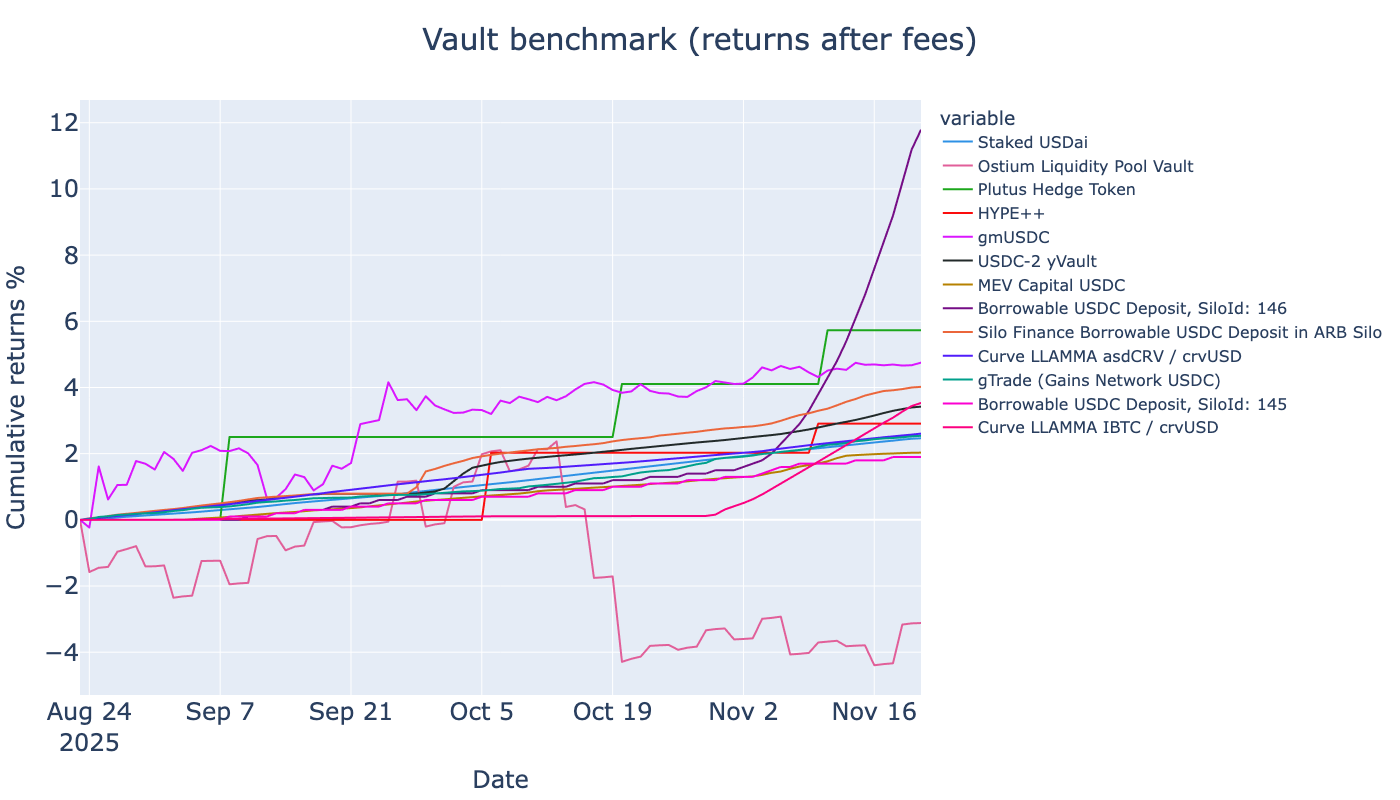

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

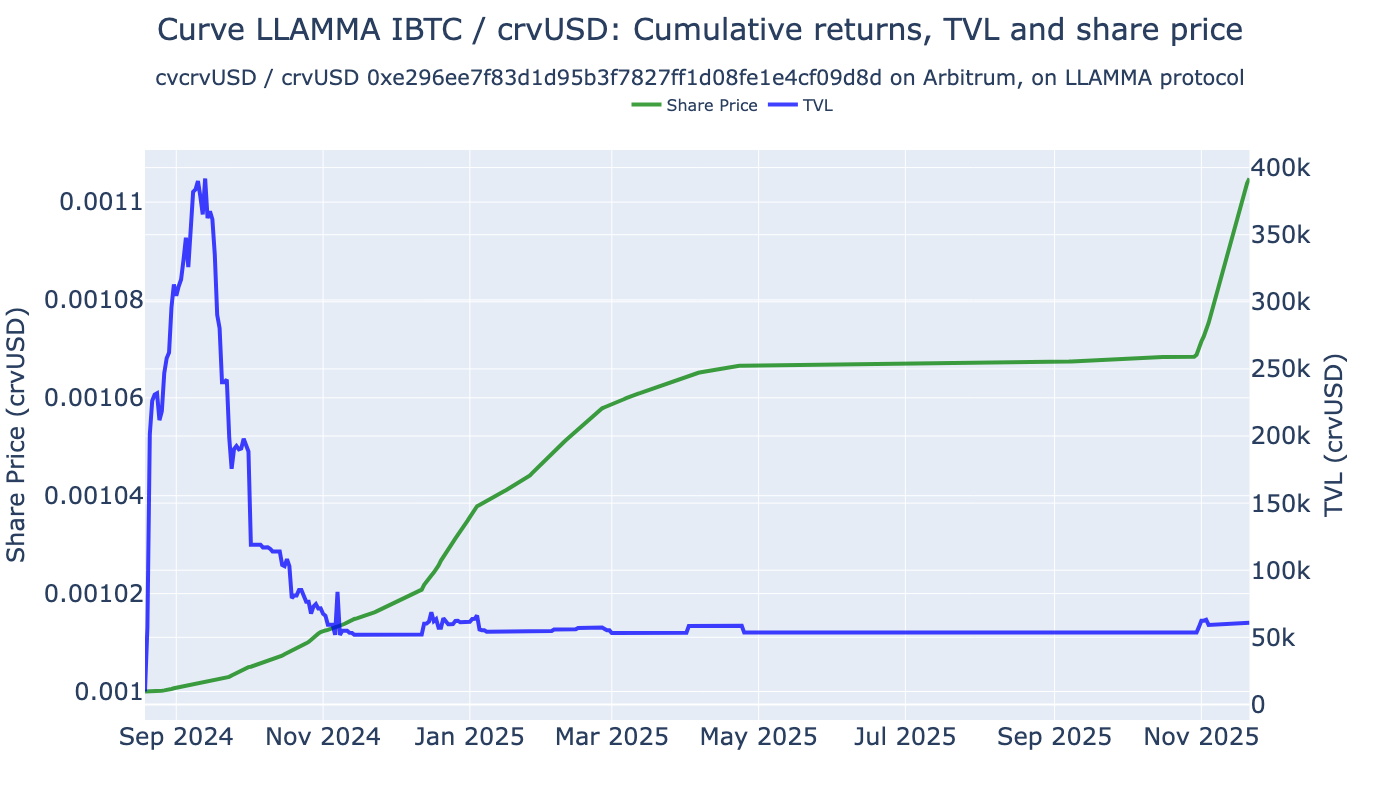

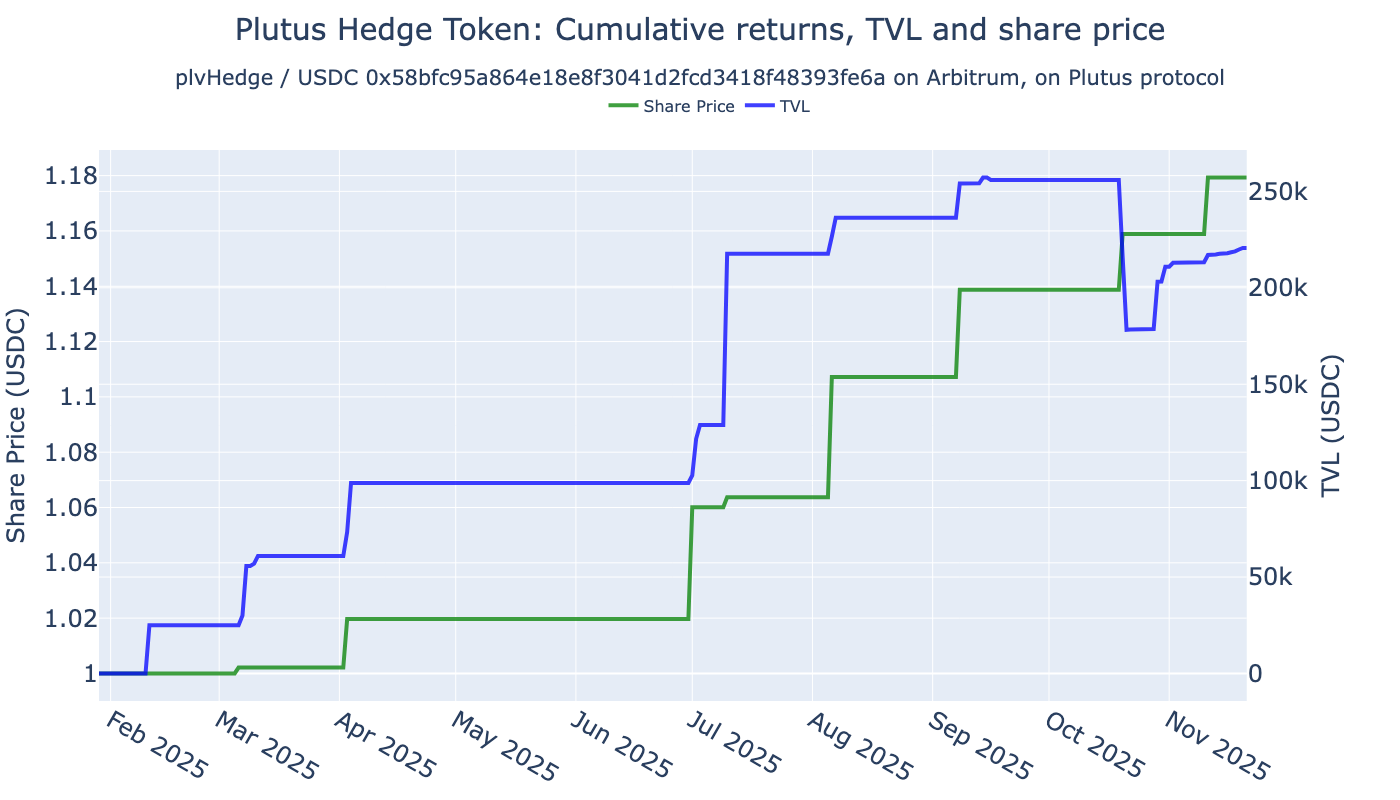

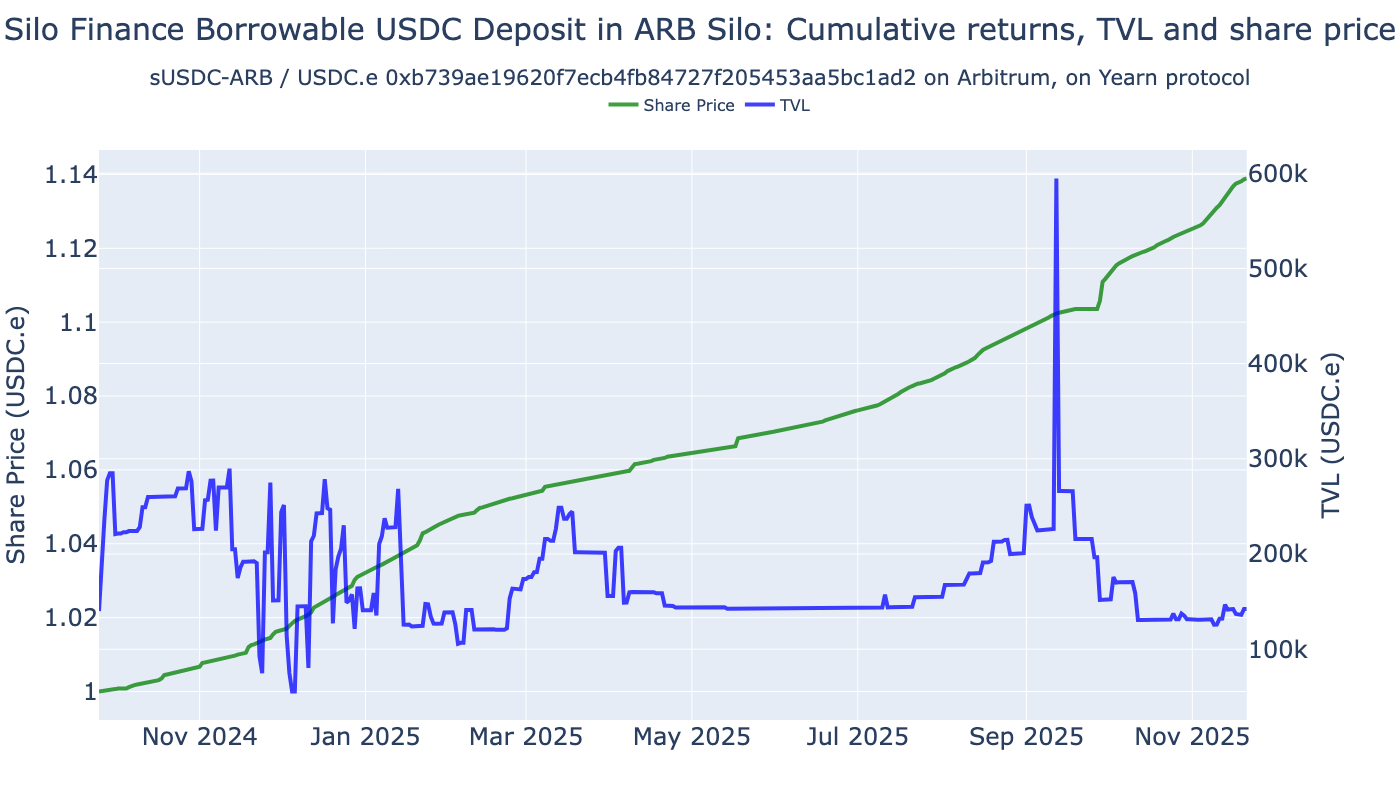

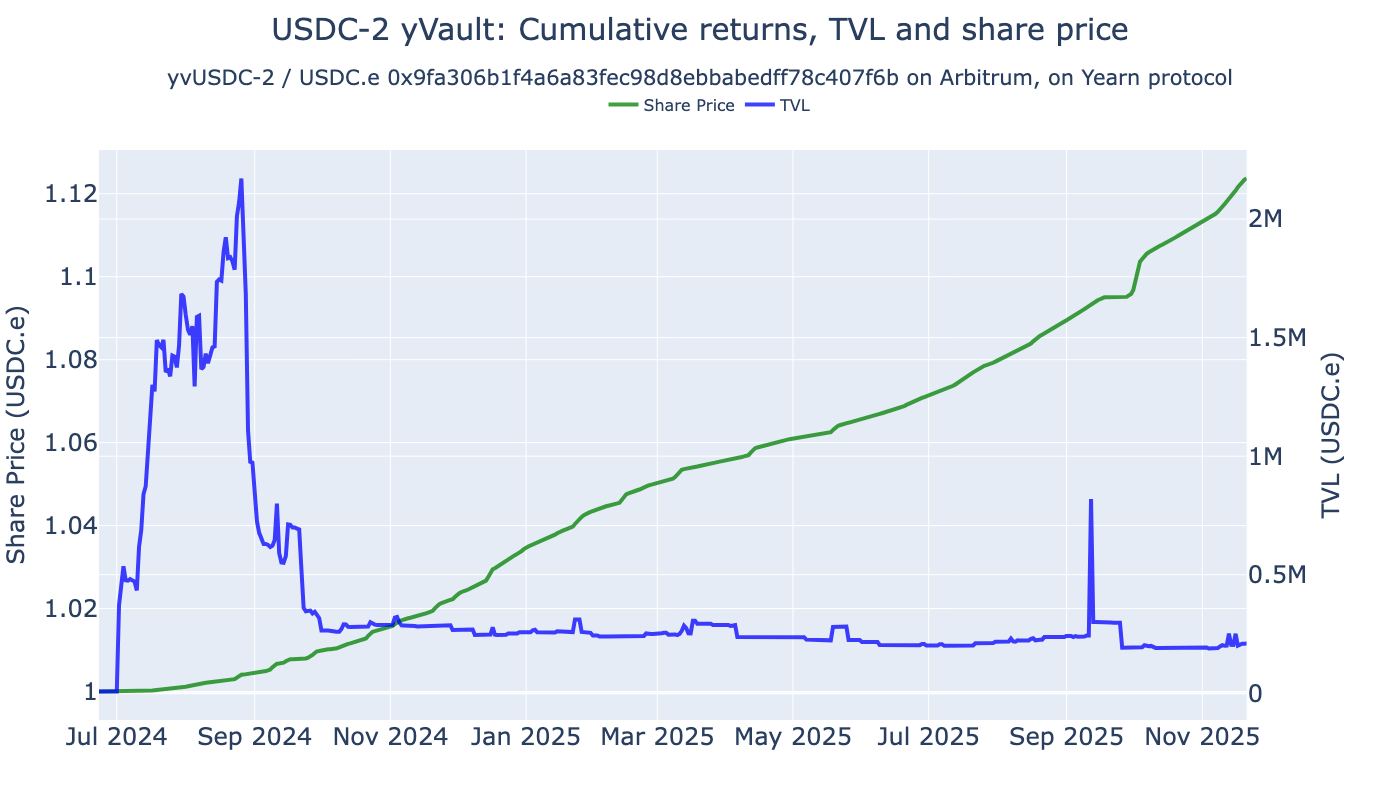

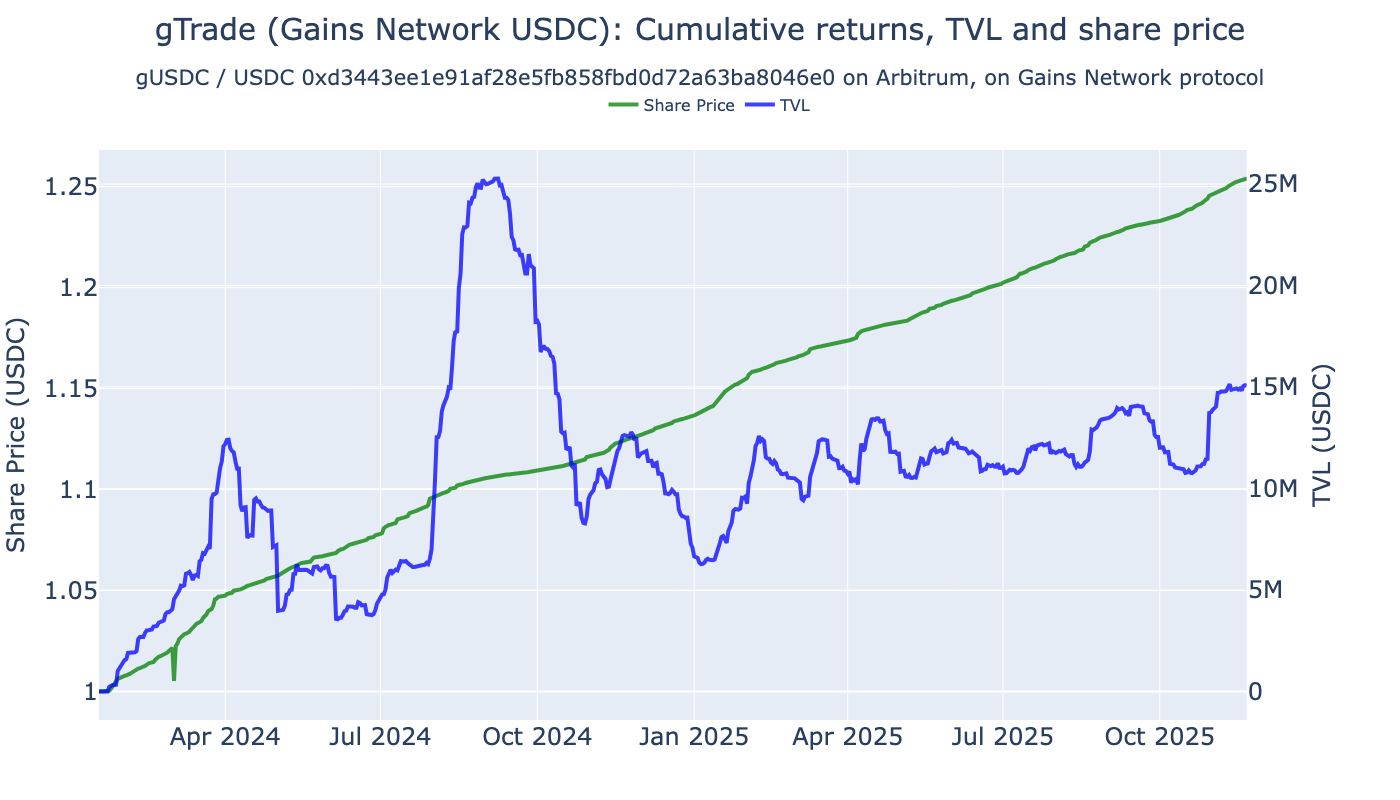

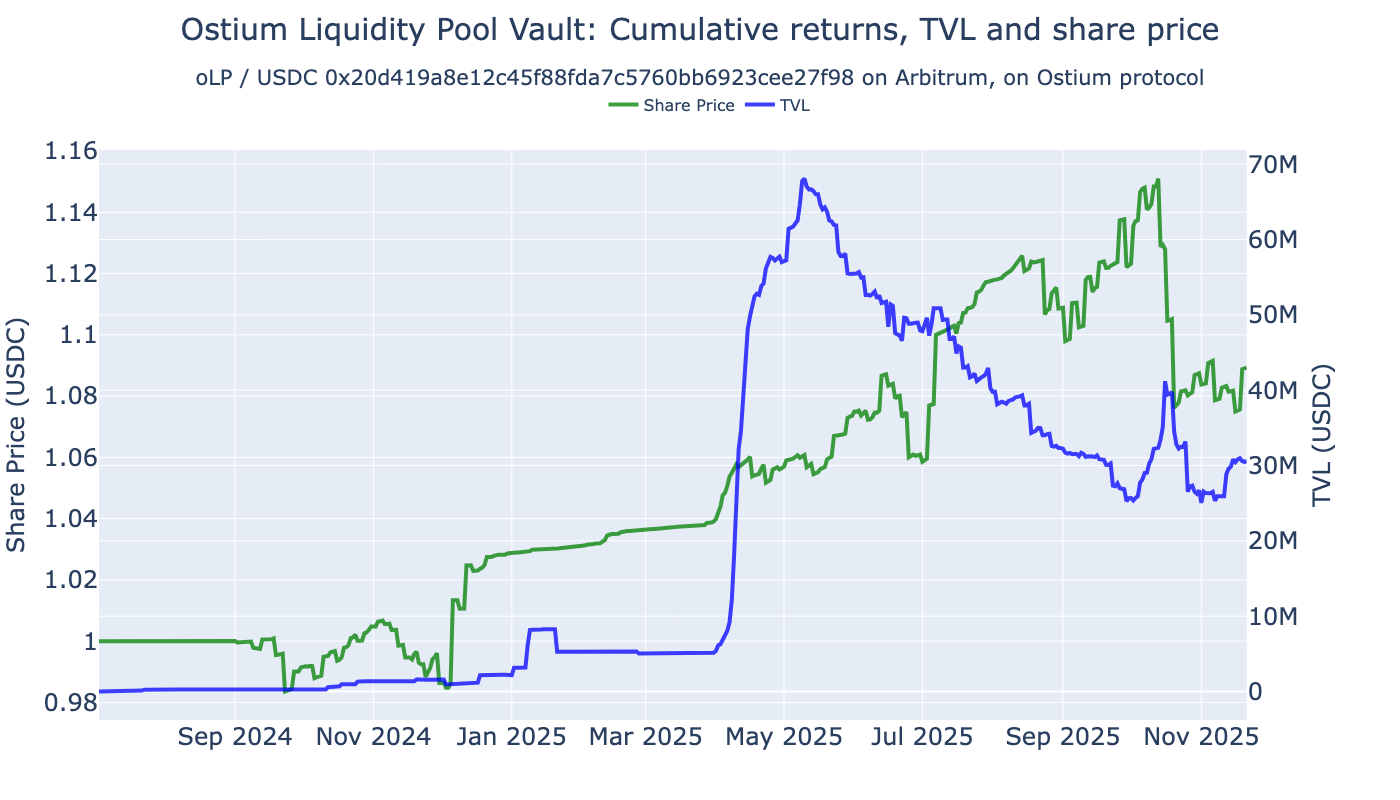

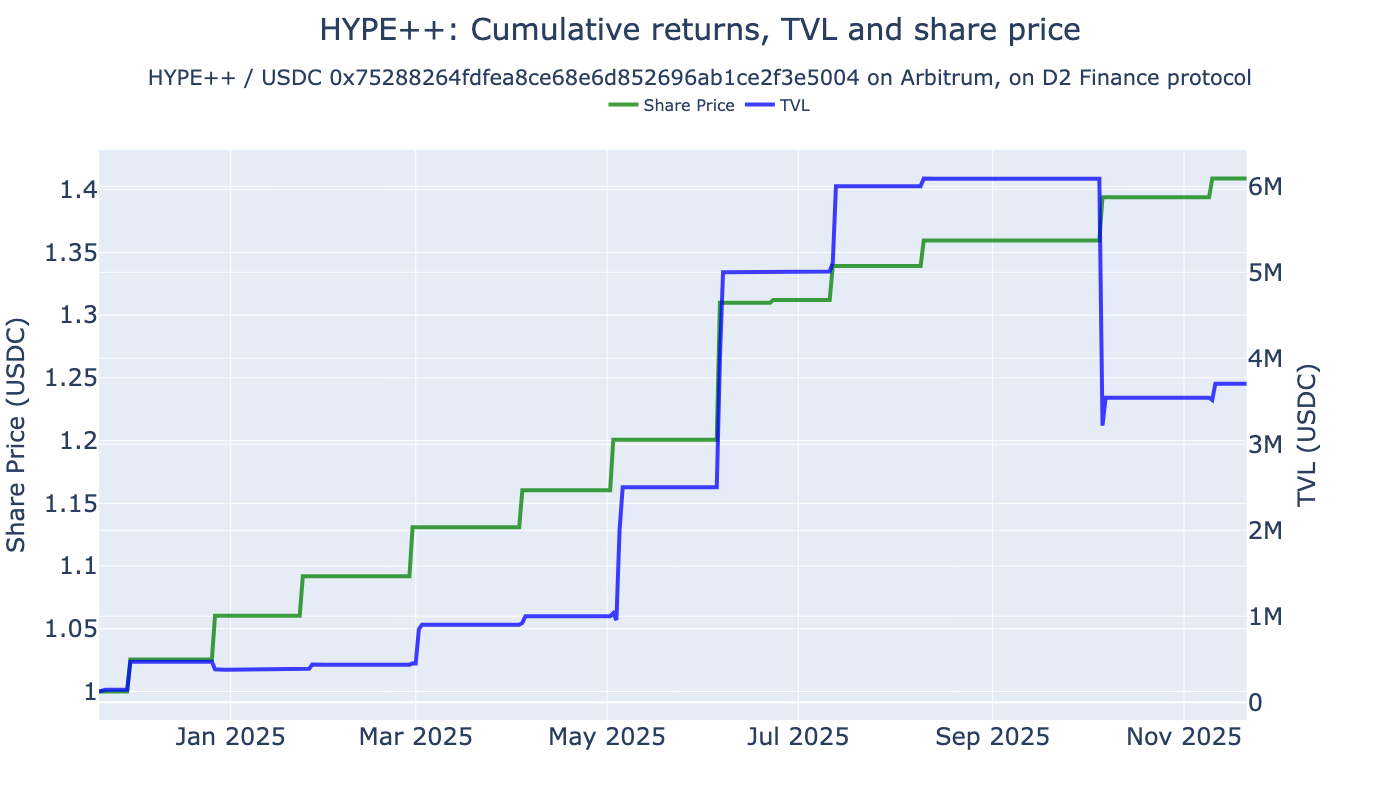

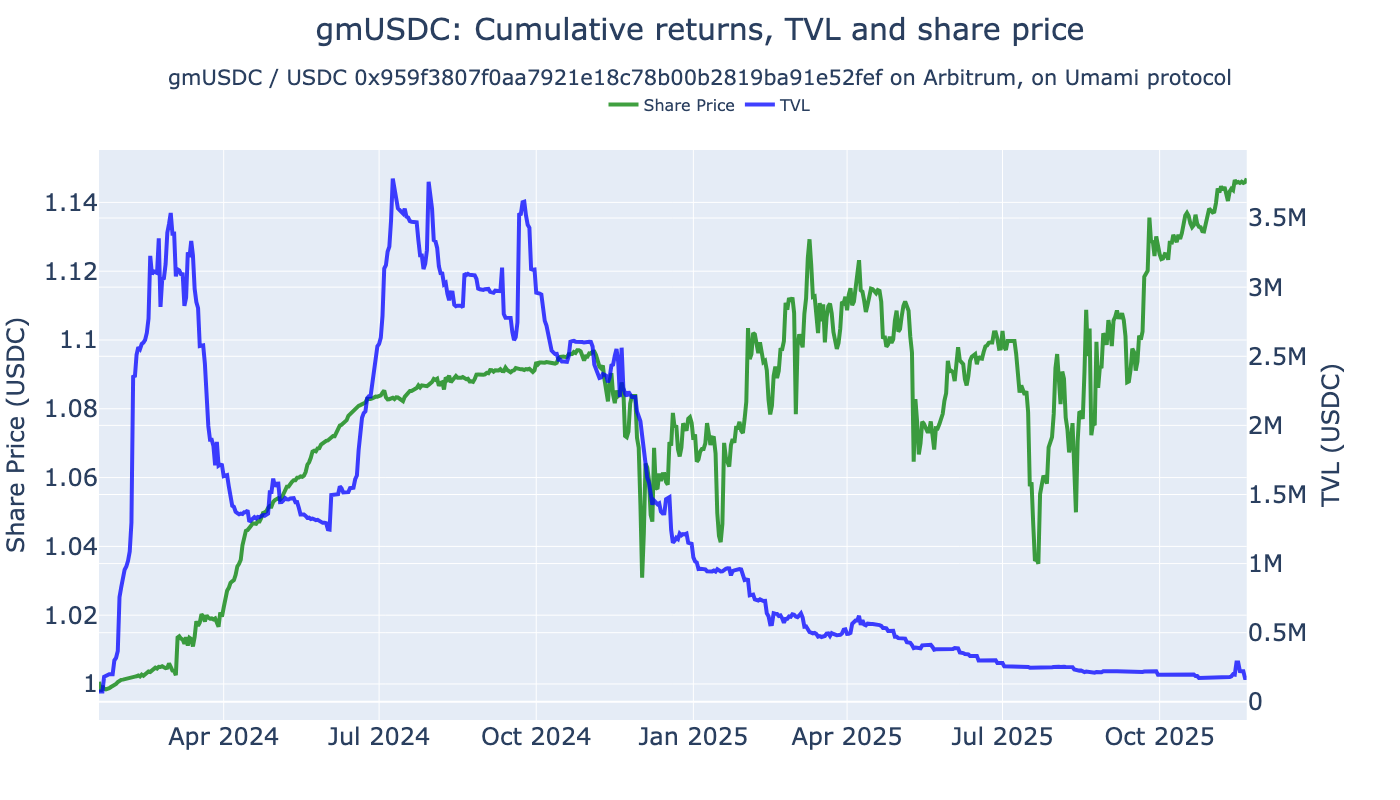

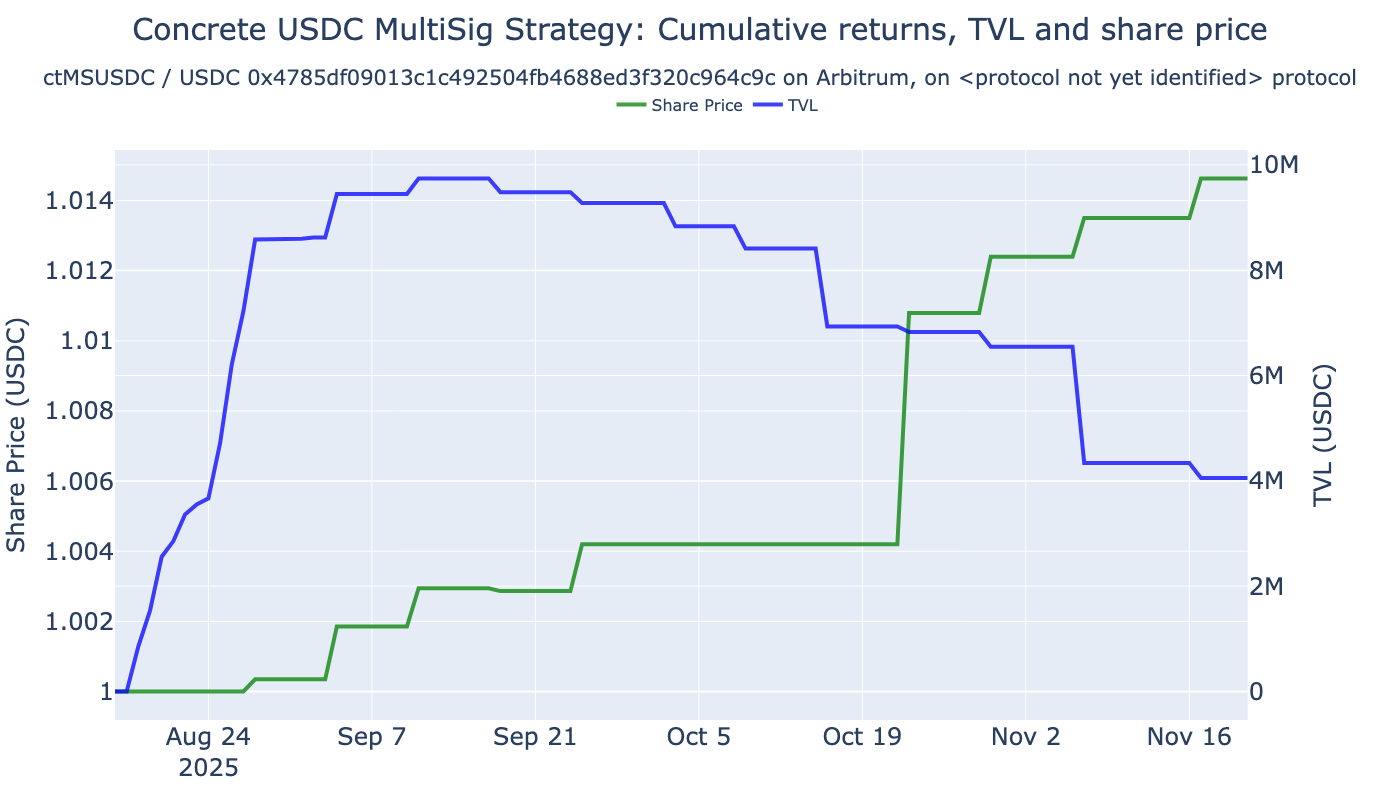

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

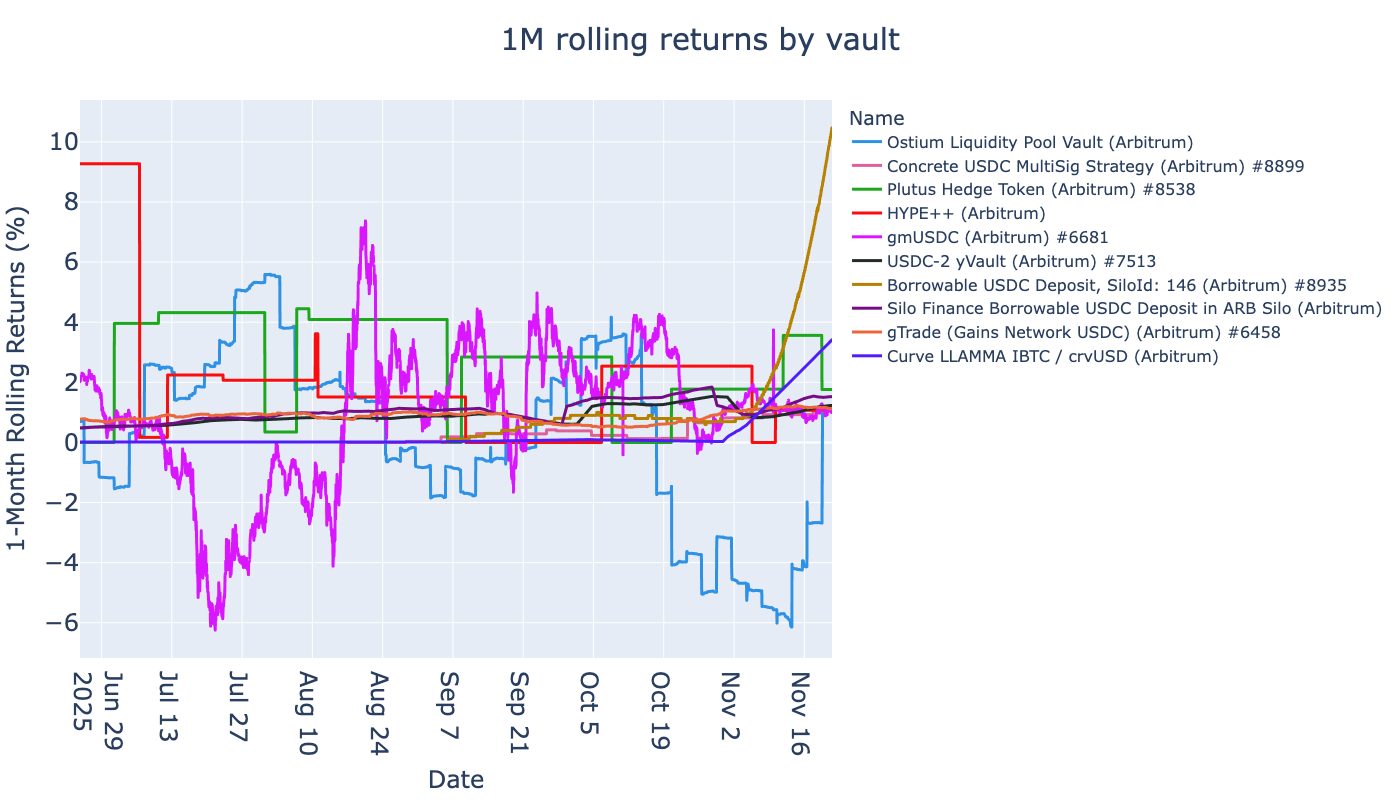

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name  \
#                                                       
1                Borrowable USDC Deposit, SiloId: 146   
2                          Curve LLAMMA IBTC / crvUSD   
3                                  Plutus Hedge Token   
4    Silo Finance Borrowable USDC Deposit in ARB Silo   
5                                       USDC-2 yVault   
6                         gTrade (Gains Network USDC)   
7                         Ostium Liquidity Pool Vault   
8                                              HYPE++   
9                                              gmUSDC   
10                    Concrete USDC MultiSig Strategy   
11                                   MEV Capital USDC   
12                                         autoSUSDai   
13               Borrowable USDC Deposit, SiloId: 145   
14                                       Staked USDai   
15                       Curve LLAMMA asdCRV / crvUSD   
16                          Clearstar High Yield USDC   
17                             Clearstar USDC Reactor   
18                                     Hyperithm USDC   
19                               DAMM Stablecoin Fund   
20                            Yield Chasing Silo USDC   
21                              K3 Capital USDai USDC   
22                                   Yearn Degen USDC   
23                               Yield Chasing crvUSD   
24                                     Tokemak arbUSD   
25                         gTrade (Gains Network DAI)   
26                                    Euler Earn USDC   
27                                 Gauntlet USDC Core   
28                                 Frontier Theo USDC   
29                                     Dolomite: USDC   
30                                         Saving USX   
31                                Euler Arbitrum USDC   
32                          Euler Arbitrum Yield USDC   
33                         Steakhouse High Yield USDC   
34                                     Dolomite: USDT   
35                             K3 Capital USDai USDT0   
36                                 Yield Chasing USDC   
37                                   Spark USDC Vault   
38                         Curve LLAMMA WBTC / crvUSD   
39                 Peapods Interest Bearing USDC - 25   
40                                    Fluid Gho Token   
41                                     Fluid USD Coin   
42                         Static Aave Arbitrum USDCn   
43                        Wrapped Aave Arbitrum USDCn   
44               Crypto.com Defi Wallet Compound USDC   
45                         Wrapped Aave Arbitrum USDT   
46                          Static Aave Arbitrum USDT   
47                                Gauntlet USDC Prime   
48                          Wrapped Aave Arbitrum GHO   
49                   Crypto.com Defi Wallet AAVE USDC   
50                                        Staked USDX   
51                                    Summer.fi USD₮0   
52                   Crypto.com Defi Wallet AAVE USDT   
53                                   Fluid Tether USD   
54                         Curve LLAMMA WETH / crvUSD   
55                         fija Strategy USDC AaveOpt   
56                                        Staked EURA   
57                          Curve LLAMMA ARB / crvUSD   
58                    Concrete USDC MultiSig Strategy   
59                         Curve LLAMMA EYWA / crvUSD   
60                                          autoUSDai   
61                                           MS-sUSDe   
62                                        satUSD_plus   
63                                        Silo Optima   
64               Borrowable xUSD Deposit, SiloId: 146   
65                              Varlamore USDC Growth   
66                  yPT-USDe (auto-rolling Pendle PT)   
67                            K3 Capital USDai sUSDai   
68                               AI Dollar Alpha USDT   
69                                 Karak - Tether USD   
70